In [1]:
import requests
import csv
import datetime

In [2]:
url = 'https://api.covid19api.com/dayone/country/brazil'
requisicao = requests.get(url)
raw_data = requisicao.json()

In [3]:
final_data = []
for obs in raw_data:
    final_data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'],
                       obs['Active'], obs['Date'][:10]])
final_data.insert(0, ['Confirmados', 'Obitos', 'Recuperados', 'Ativos', 'Data'])

In [4]:
confirmados = 0
mortos = 1
recuperados = 2
ativos = 3
data = 4

In [5]:
with open('brasil-covid.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(final_data)

In [6]:
for dados_diarios in range(1, len(final_data)):
    final_data[dados_diarios][data] = datetime.datetime.strptime(final_data[dados_diarios][data], '%Y-%m-%d')

In [10]:
def get_datasets(y, labels):
    if type(y[0]) == list:
        datasets = []
        for i in range(len(y)):
            datasets.append({
                'label':labels[i],
                'data':y[i]
            })
        return datasets
    else:
        return [{
            'label':labels[0],
            'data':y
        }]

In [11]:
def set_title(title=''):
    if title != '':
        display = 'true'
    else:
        display = 'false'
    return {
        'title':title,
        'display':display
    }

In [12]:
def create_chart(x, y, labels, kind='bar', title=''):
    datasets = get_datasets(y, labels)
    options = set_title(title)
    chart = {
        'type':kind,
        'data': {
            'labels':x,
            'datasets':datasets
        },
        'options':options
    }
    return chart

In [13]:
def get_api_chart(chart):
    url_base = 'https://quickchart.io/chart'
    resp = requests.get(f'{url_base}?c={str(chart)}')
    return resp.content

In [14]:
def save_image(path, content):
    with open(path, 'wb') as image:
        image.write(content)

In [18]:
!pip install --upgrade pip

In [22]:
!pip install --upgrade Pillow

In [23]:
from PIL import Image
from IPython.display import display

In [25]:
def display_image(path):
    img_pil = Image.open(path)
    display(img_pil)

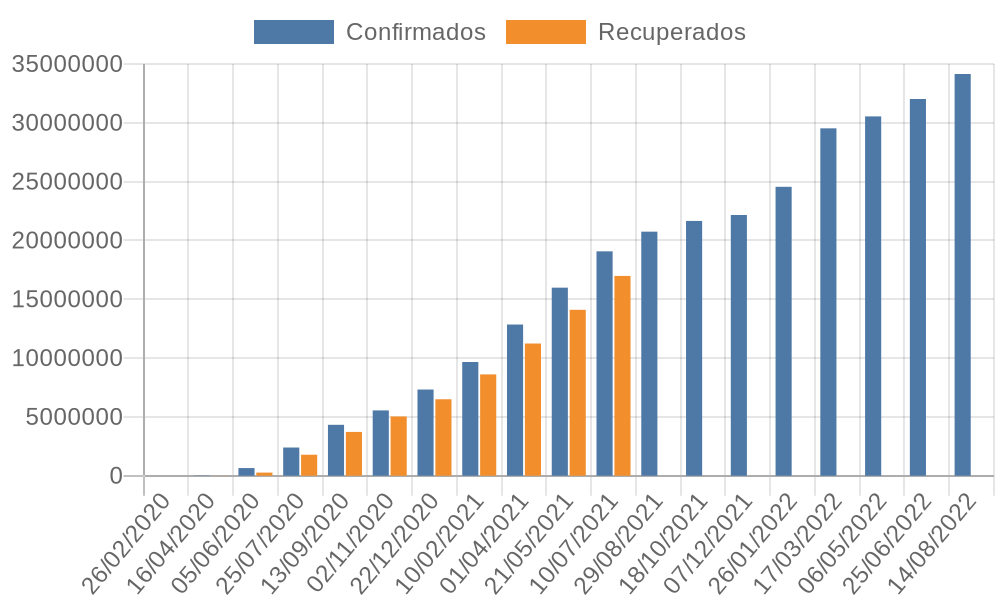

In [30]:
y_data_1 = []
for obs in final_data[1::50]:
    y_data_1.append(obs[confirmados])
y_data_2 = []
for obs in final_data[1::50]:
    y_data_2.append(obs[recuperados])
labels = ['Confirmados', 'Recuperados']
x = []
for obs in final_data[1::50]:
    x.append(obs[data].strftime('%d/%m/%Y'))
    
chart = create_chart(x, [y_data_1, y_data_2], labels, title='Grafico confirmados e recuperados')
chart_content = get_api_chart(chart)
save_image('meu-primeiro-grafico.png', chart_content)
display_image('meu-primeiro-grafico.png')

In [32]:
from urllib.parse import quote

In [35]:
def get_api_qrcode(link):
    text = quote(link) # parsing do link para url
    url_base = 'https://quickchart.io/qr'
    resp = requests.get(f'{url_base}?text={text}')
    return resp.content

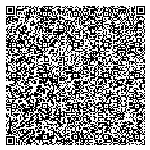

In [36]:
url_base = 'https://quickchart.io/chart'
link = f'{url_base}?c={str(chart)}'
qrcode_content = get_api_qrcode(link)
save_image('qr-code.png', qrcode_content)
display_image('qr-code.png')